In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

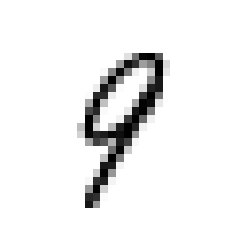

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[22]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
y[22]
y = y.astype(np.uint8)#将y转换为整型

In [19]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [20]:
import numpy as np

#shuffle_index = np.random.permutation(60000)
#X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [22]:
from sklearn.linear_model import SGDClassifier#使用随机梯度下降法

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_9)
sgd_clf.predict([some_digit])

array([False])

In [25]:
from sklearn.model_selection import cross_val_score#3折交叉验证
cross_val_score(sgd_clf, X_train, y_train_9, cv = 3, scoring = "accuracy")

array([0.9456 , 0.95195, 0.9509 ])

准确率95%左右，但是由于二分类中两个类别的实例数相差很大，使用accuracy来评价是不准确的
在本例中直接全部预测为0也能得到90%左右的准确率

In [26]:
#全部预测为0的二分类器
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
    
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv = 3, scoring = "accuracy")

array([0.8993 , 0.8999 , 0.90335])

In [28]:
#混淆矩阵
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv = 3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_pred)

array([[52715,  1336],
       [ 1695,  4254]], dtype=int64)

In [30]:
#完美预测的混淆矩阵
y_train_perfect_predictions = y_train_9
confusion_matrix(y_train_9, y_train_perfect_predictions)

array([[54051,     0],
       [    0,  5949]], dtype=int64)

In [32]:
#精度和召回率
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_9, y_train_pred)#精度 = TP /(TP+FP)

0.7610017889087657

In [33]:
recall_score(y_train_9, y_train_pred)#召回率 = TP / (TP+FN)

0.7150781643973777

In [36]:
#F1分数
from sklearn.metrics import f1_score

f1_score(y_train_9, y_train_pred)

0.737325591472398

In [37]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-174.69060734])

In [40]:
threshold = -1000#尝试设定阈值
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [42]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv = 3, method = "decision_function")

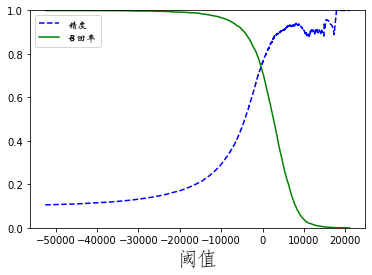

In [67]:
import matplotlib
myfont = matplotlib.font_manager.FontProperties(fname = 'C:\Windows\Fonts\STXINWEI.TTF')

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "精度")#精度
    plt.plot(thresholds, recalls[:-1], "g-", label = "召回率")#召回率
    plt.xlabel("阈值", fontproperties = "FangSong", fontsize = 20)
    plt.legend(loc = "upper left", prop = myfont)
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

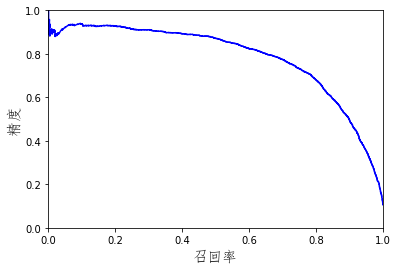

In [68]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b-")
    plt.xlabel("召回率", fontproperties = "FangSong", fontsize = 15)
    plt.ylabel("精度", fontproperties = "FangSong", fontsize = 15)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [74]:
threshold_85_precision = thresholds[np.argmax(precisions >= 0.85)]
threshold_85_precision

2009.8275240991843

In [75]:
y_train_pred_85 = (y_scores >= threshold_85_precision)
precision_score(y_train_9, y_train_pred_85)

0.8500258131130615

In [76]:
recall_score(y_train_9, y_train_pred_85)

0.5535384098167759

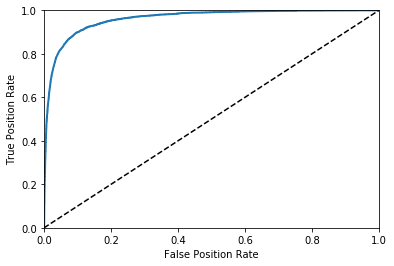

In [78]:
#ROC曲线
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Position Rate')
    plt.ylabel('True Position Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [79]:
#AUC
from  sklearn.metrics import roc_auc_score

roc_auc_score(y_train_9, y_scores)

0.96114559368217

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


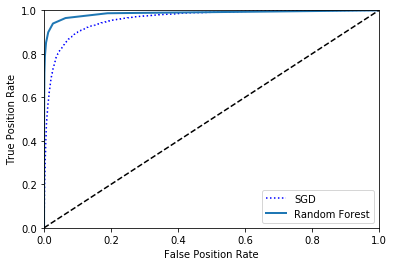

In [81]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv = 3, method = "predict_proba")
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9, y_scores_forest)
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [83]:
roc_auc_score(y_train_9, y_scores_forest)

0.986441779976706